In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('../data/heart_disease_preprocessed.csv')
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [13]:
pca = PCA()
X_pca = pca.fit_transform(X)

In [14]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
optimal_components = np.argmax(cumsum >= 0.95) + 1

print(f"Components for 95% variance: {optimal_components}")

Components for 95% variance: 12


In [15]:
pca_final = PCA(n_components=optimal_components)
X_pca_final = pca_final.fit_transform(X)

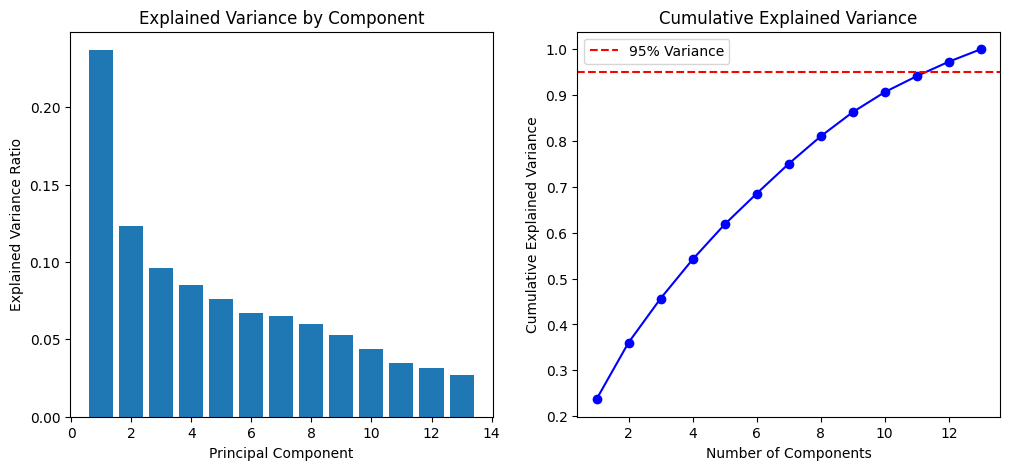

In [16]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.title('Explained Variance by Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')

plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumsum) + 1), cumsum, 'bo-')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.show()

In [18]:
pd.DataFrame(X_pca_final).to_csv('../data/heart_disease_pca.csv', index=False)
print("PCA analysis complete!")

PCA analysis complete!
